<a href="https://colab.research.google.com/github/SanghunOh/learn_DeepLearning/blob/master/NLP/8_RecurrentNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### from https://youtu.be/hGuUFVZ_tSs

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

In [2]:
state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

succesive_outputs = list()

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  succesive_outputs.append(output_t)
  state_t = output_t 

final_ouptput_sequence = np.stack(succesive_outputs, axis=0)
final_ouptput_sequence

array([[0.99999996, 1.        , 1.        , ..., 0.99999996, 0.99999961,
        0.99999995],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [3]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))  
# ValueError: Input 0 of layer simple_rnn_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  
model.summary()

## IMDB 데이터 적용

### 데이터 로드

In [9]:
from tensorflow.keras.datasets import imdb

In [10]:
vocab_size = 10000

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=vocab_size)
len(input_train), len(input_test), input_train.shape, input_test.shape

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000, 25000, (25000,), (25000,))

In [11]:
from tensorflow.keras.preprocessing import sequence

max_len = 500
x_train = sequence.pad_sequences(input_train, maxlen=max_len)
x_test = sequence.pad_sequences(input_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

### 모델 구성

In [59]:
import tensorflow as tf
import numpy as np

raw_inputs = np.array([[1,2,3],[4,5,6],[7,8,9]])
embedding = tf.keras.layers.Embedding(input_dim=10, output_dim=4)

outputs = embedding(raw_inputs)
outputs

<tf.Tensor: shape=(3, 3, 4), dtype=float32, numpy=
array([[[-0.00784566, -0.02204928, -0.03408428, -0.04385064],
        [ 0.00507622,  0.04447166, -0.04245411,  0.00379325],
        [ 0.03574561, -0.03291982,  0.03275356,  0.00769701]],

       [[-0.04699612,  0.000105  ,  0.02444604, -0.04704022],
        [-0.01462909, -0.01118188,  0.00776777, -0.04616939],
        [-0.03883702, -0.02270868,  0.04579786,  0.03613842]],

       [[ 0.02167476, -0.0425374 , -0.0470854 , -0.01401937],
        [ 0.02130613,  0.0135067 , -0.0289029 , -0.04573511],
        [-0.03767594, -0.01881344, -0.01464494,  0.00353013]]],
      dtype=float32)>

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [14]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [22]:
hist = model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 67s 425ms/step - loss: 0.0492 - acc: 0.9851 - val_loss: 0.6980 - val_acc: 0.7694
Epoch 2/10
157/157 [==============================] - 68s 431ms/step - loss: 0.0309 - acc: 0.9907 - val_loss: 0.5645 - val_acc: 0.8344
Epoch 3/10
157/157 [==============================] - 66s 423ms/step - loss: 0.0202 - acc: 0.9939 - val_loss: 0.6547 - val_acc: 0.8254
Epoch 4/10
157/157 [==============================] - 66s 423ms/step - loss: 0.0174 - acc: 0.9944 - val_loss: 0.6655 - val_acc: 0.8316
Epoch 5/10
157/157 [==============================] - 66s 419ms/step - loss: 0.0147 - acc: 0.9959 - val_loss: 0.7425 - val_acc: 0.8012
Epoch 6/10
157/157 [==============================] - 66s 420ms/step - loss: 0.0162 - acc: 0.9955 - val_loss: 0.7191 - val_acc: 0.8260
Epoch 7/10
157/157 [==============================] - 67s 424ms/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.7865 - val_acc: 0.8114
Epoch 8/10
157/157 [==============================] - 6

### 시각화

In [17]:
import matplotlib.pyplot as plt

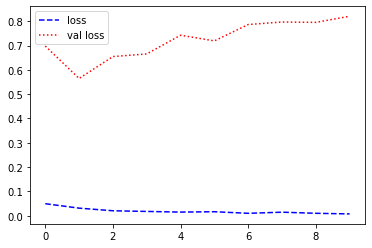

In [23]:
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val loss')
plt.legend()

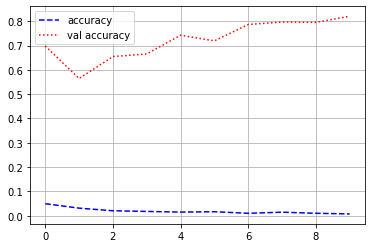

In [24]:
plt.plot(hist.history['loss'], 'b--', label='accuracy')
plt.plot(hist.history['val_loss'], 'r:', label='val accuracy')
plt.grid()
plt.legend()

In [25]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 28s 36ms/step - loss: 0.8394 - acc: 0.8248


[0.83943772315979, 0.8248400092124939]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [26]:
vocab_size = 10000
max_len = 500

In [27]:
x_train = sequence.pad_sequences(input_train, maxlen=max_len)
x_test = sequence.pad_sequences(input_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

### 모델 구성

In [29]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [30]:
hist = model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 31ms/step - loss: 0.4904 - acc: 0.7695 - val_loss: 0.3283 - val_acc: 0.8716
Epoch 2/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2881 - acc: 0.8871 - val_loss: 0.2938 - val_acc: 0.8816
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2341 - acc: 0.9107 - val_loss: 0.3849 - val_acc: 0.8592
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1972 - acc: 0.9266 - val_loss: 0.2915 - val_acc: 0.8874
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1748 - acc: 0.9366 - val_loss: 0.3399 - val_acc: 0.8886
Epoch 6/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1615 - acc: 0.9427 - val_loss: 0.2973 - val_acc: 0.8892
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1448 - acc: 0.9492 - val_loss: 0.3110 - val_acc: 0.8734
Epoch 8/10
157/157 [==============================] - 4s 26ms/step -

### 시각화

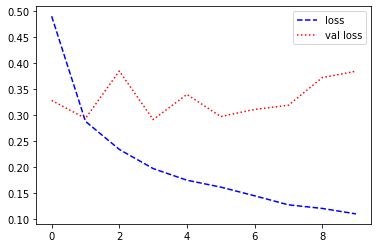

In [36]:
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val loss')
plt.legend()


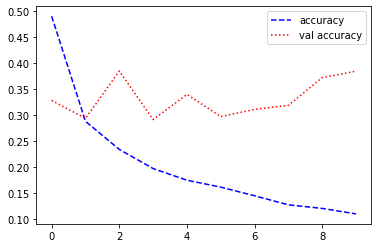

In [38]:
plt.plot(hist.history['loss'], 'b--', label='accuracy')
plt.plot(hist.history['val_loss'], 'r:', label='val accuracy')
# plt.grid()
plt.legend()


### 모델 평가

In [32]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.4146 - acc: 0.8535


[0.41459211707115173, 0.8535199761390686]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [39]:
from tensorflow.keras.datasets import reuters

In [40]:
vocab_size = 10000
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=vocab_size)
input_train.shape, input_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (2246,))

### 데이터 전처리 및 확인

In [41]:
from tensorflow.keras.preprocessing import sequence
max_len = 300

In [42]:
x_train = sequence.pad_sequences(input_train, maxlen=max_len)
x_test = sequence.pad_sequences(input_test, maxlen=max_len)
x_train.shape, x_test.shape

((8982, 300), (2246, 300))

In [ ]:
x_train[0]

In [ ]:
x_test[3]

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [43]:
from tensorflow.keras.layers import GRU

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         394752    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [46]:
hist = model.fit(x_train, y_train,
                 batch_size=128, epochs=10,
                 validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 9s 115ms/step - loss: 2.3430 - acc: 0.4013 - val_loss: 1.8809 - val_acc: 0.5142
Epoch 2/10
57/57 [==============================] - 6s 105ms/step - loss: 1.7666 - acc: 0.5279 - val_loss: 1.7827 - val_acc: 0.5326
Epoch 3/10
57/57 [==============================] - 6s 106ms/step - loss: 1.6000 - acc: 0.5790 - val_loss: 1.7482 - val_acc: 0.5710
Epoch 4/10
57/57 [==============================] - 6s 107ms/step - loss: 1.4061 - acc: 0.6323 - val_loss: 2.1609 - val_acc: 0.5470
Epoch 5/10
57/57 [==============================] - 6s 107ms/step - loss: 1.2500 - acc: 0.6781 - val_loss: 1.6705 - val_acc: 0.5921
Epoch 6/10
57/57 [==============================] - 6s 107ms/step - loss: 1.1057 - acc: 0.7136 - val_loss: 1.5783 - val_acc: 0.6238
Epoch 7/10
57/57 [==============================] - 6s 107ms/step - loss: 1.0122 - acc: 0.7364 - val_loss: 1.5961 - val_acc: 0.6272
Epoch 8/10
57/57 [==============================] - 6s 106ms/step - loss: 0.

### 시각화

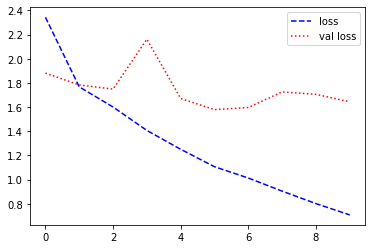

In [48]:
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val loss')
plt.legend()

### 모델 평가


In [47]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 13ms/step - loss: 1.7137 - acc: 0.6456


[1.713731288909912, 0.6455921530723572]